# Importando Libraries e Dataset

In [5]:
# Importando Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lendo Dataset
bestsellers = pd.read_csv("../data/bestsellers with categories.csv")
bestsellers.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


- **Name:** O título do livro.
- **Author:** O nome do autor ou autora do livro.
- **User Rating:** A média das avaliações dos usuários, geralmente em uma escala de 1 a 5, representando a satisfação geral dos leitores com o livro.
- **Reviews:** O número total de resenhas que o livro recebeu de usuários.
- **Price:** O preço do livro.
- **Year:** O ano de lançamento ou publicação do livro.
- **Genre:** O gênero literário ao qual o livro pertence. "Non Fiction" indica que o livro é de não-ficção, ou "Fiction" indica que é um romance ou obra de ficção.

# Descrição e estrutura dos dados

#### A. Estrutura de colunas do Dataframe

In [6]:
bestsellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


#### B. Descrição estatística do Dataframe em colunas

In [7]:
bestsellers.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


#### C. Procurando por valores NaNs(Ausentes)

In [8]:
bestsellers.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

# Pergunta #1: Quais são os autores mais recorrentes?

#### A. Conta Quantas Vezes Cada Autor Aparece.

In [9]:
atoresRecorrentes = bestsellers["Author"].value_counts()
print(atoresRecorrentes)

Author
Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Keith Richards                         1
Chris Cleave                           1
Alice Schertle                         1
Celeste Ng                             1
Adam Gasiewski                         1
Name: count, Length: 248, dtype: int64


#### B. Pega o Maior, Menor e os mais Recorrentes Valores da Quantidade de Autores que Aparecem.

In [10]:
#Autor mais recorrente
maisRecorrente = atoresRecorrentes.idxmax()
maisRecorrenteValue = atoresRecorrentes.max()

#Autor menos recorrente
menosRecorrente = atoresRecorrentes.idxmin()
menosRecorrenteValue = atoresRecorrentes.min()

#Autores mais recorrentes
autoresMaisRecorrentes = atoresRecorrentes.head(5)
print(autoresMaisRecorrentes)

Author
Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
Name: count, dtype: int64


#### C. Planejando Autores Mais Recorrentes.

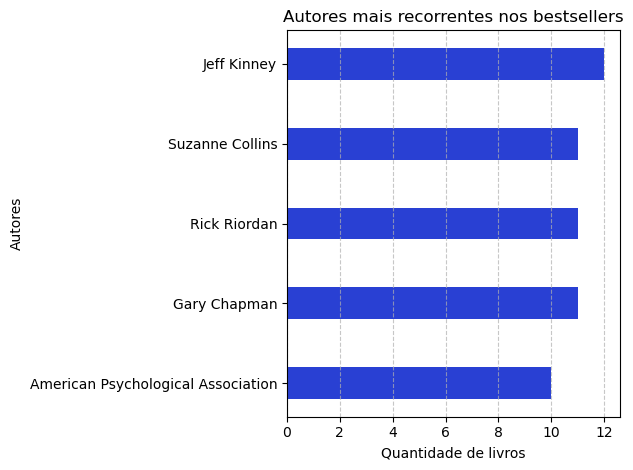

In [25]:
#Grafico autores mais recorrentes
autoresMaisRecorrentes = autoresMaisRecorrentes.sort_values(ascending=True)

plt.barh(autoresMaisRecorrentes.index, autoresMaisRecorrentes.values, height=0.4, color = '#2940d3')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.title("Autores mais recorrentes nos bestsellers")
plt.ylabel("Autores")
plt.xlabel("Quantidade de livros")
plt.tight_layout()

plt.savefig("../images/01-autores-recorrentes.png")
plt.show()

#### Resultado:
- O autor mais recorrente é Jeff Kinney, com 12 livros.
- Os demais autores listados possuem 10 ou 11 livros cada.

# Pergunta #2: O número de reviews influencia na nota("User Rating")?

#### A. Verificando a Correlação Entre as Colunas.

In [18]:
corrReviewNota = bestsellers["Reviews"].corr(bestsellers["User Rating"])
print("Correlação entre número de reviews e nota do usuário:", corrReviewNota)

Correlação entre número de reviews e nota do usuário: -0.0017290142555500398


#### B. Planejando Correlação entre Reviews e Nota("User Rating").

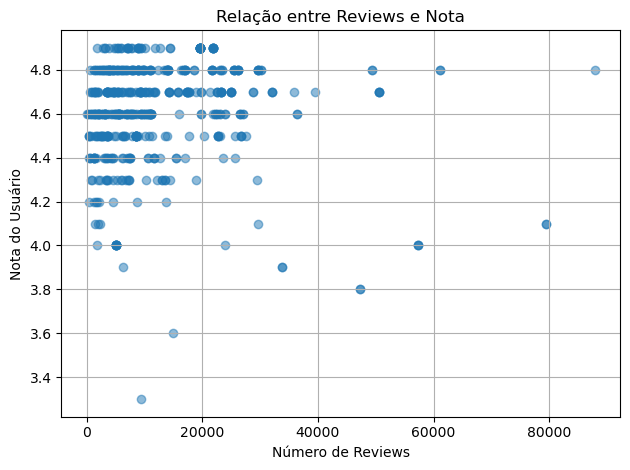

In [24]:
plt.scatter(bestsellers["Reviews"], bestsellers["User Rating"], alpha=0.5)
plt.xlabel("Número de Reviews")
plt.ylabel("Nota do Usuário")
plt.title("Relação entre Reviews e Nota")
plt.grid()
plt.tight_layout()

plt.savefig("../images/02-corr-reviews-rating.png")
plt.show()

#### Resultado:
- A maioria dos livros possui notas entre 4.6 e 4.9, independentemente da quantidade de reviews.
- A maior parte dos livros tem menos de 20.000 reviews, e poucos ultrapassam esse valor.
- A linha de regressão é praticamente horizontal, o que sugere baixa correlação entre o número de reviews e a nota.

# Pergunta #3: Quais anos tiveram livros com maiores médias de avaliação por gênero?

#### A. Agrupando as Avaliações por Ano e Gênero.

In [33]:
anoMediaAvaliacao = bestsellers.groupby(["Year", "Genre"])["User Rating"].mean().reset_index().sort_values(by="User Rating", ascending=False)
print(anoMediaAvaliacao.head())

    Year        Genre  User Rating
20  2019      Fiction     4.820000
18  2018      Fiction     4.738095
16  2017      Fiction     4.737500
14  2016      Fiction     4.715789
21  2019  Non Fiction     4.686667


#### B. Planejando Anos com Maiores Médias de Avaliação por Gênero

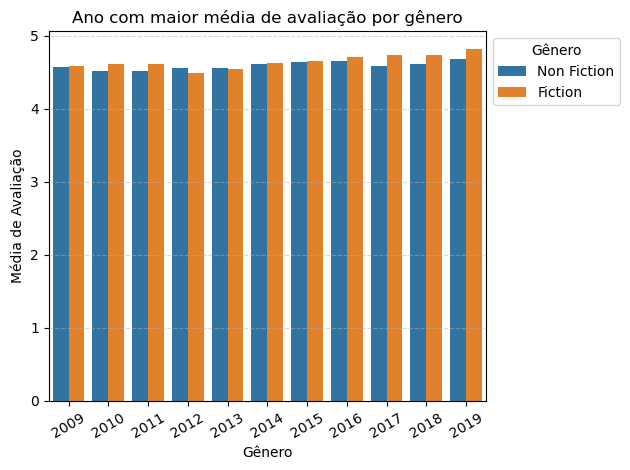

In [51]:
sns.barplot(data=anoMediaAvaliacao, x="Year", y="User Rating", hue="Genre")
plt.legend(title='Gênero', bbox_to_anchor=(1, 1))
plt.title("Ano com maior média de avaliação por gênero")
plt.ylabel("Média de Avaliação")
plt.xlabel("Gênero")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(rotation=30)
plt.tight_layout()

plt.savefig("../images/03-ano-rating-genre.png")
plt.show()

#### Resultado:
- Ambos os gêneros mantêm médias de avaliação bastante altas, todas entre 4.4 e 4.9.
- Em 2019, o gênero Fiction atingiu a maior média de avaliação, quase chegando ao 4.9.
- A partir de 2014 em diante, Fiction geralmente supera ou se iguala ao Non Fiction em média de avaliações.